# Image Recognition
### @author - Anuj jain

## Reading the raw data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
import numpy as np
import cv2
from scipy.misc import imresize
import pandas as pd


## Lets look at some of the images that we have to classify

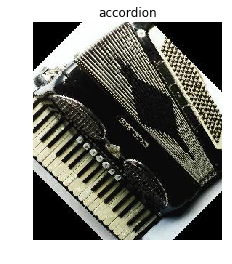

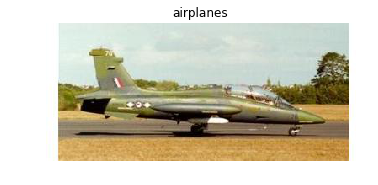

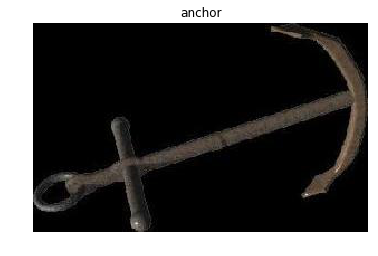

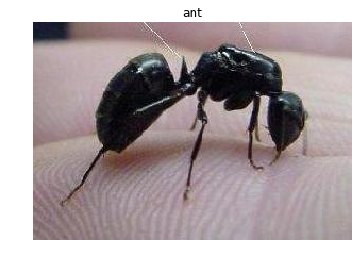

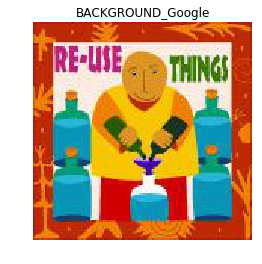

In [3]:
a=1
img_dir = '/Volumes/Work2/work/python/projects/Face Recognition/101_ObjectCategories'
for root, dirs, files in os.walk(img_dir):
    for name in dirs:
        data_path = os.path.join(img_dir,name)
        data_path2 = os.path.join(data_path,'*')
        for filename in glob.glob(data_path2): 
            im=Image.open(filename)
            plt.imshow(im)
            plt.title(name)
            plt.axis('off')
            plt.show()
            break
        if a==5:
            break
        a=a+1    

### Lets look at all the image categories and # of images available for each category

In [15]:
img_dir = '/Volumes/Work2/work/python/projects/Face Recognition/101_ObjectCategories'

for root, dirs, files in os.walk(img_dir):
    for name in dirs:
        data_path = os.path.join(img_dir,name)
        data_path2 = os.path.join(data_path,'*')
        count = 0 
        for filename in glob.glob(data_path2): 
            count =count+1
        target_unique_values.append([name,count])
        print("%-20s - %5d"%(name,count))

accordion            -    55
airplanes            -   800
anchor               -    42
ant                  -    42
BACKGROUND_Google    -   468
barrel               -    47
bass                 -    54
beaver               -    46
binocular            -    33
bonsai               -   128
brain                -    98
brontosaurus         -    43
buddha               -    85
butterfly            -    91
camera               -    50
cannon               -    43
car_side             -   123
ceiling_fan          -    47
cellphone            -    59
chair                -    62
chandelier           -   107
cougar_body          -    47
cougar_face          -    69
crab                 -    73
crayfish             -    70
crocodile            -    50
crocodile_head       -    51
cup                  -    57
dalmatian            -    67
dollar_bill          -    52
dolphin              -    65
dragonfly            -    68
electric_guitar      -    75
elephant             -    64
emu           

In [ ]:
# We can see from the above data that for some categories,there is very few images(~30).
# We need to do data augmentation for those categories

# Data Prepration

## Data Augmentaion

In [4]:
from skimage import util
from skimage.color import rgb2gray
from skimage.transform import rotate

In [136]:
def show_images(image, names):
    fig, axes = plt.subplots(nrows=1, ncols=5)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    for i in range(5):
        axes[i].imshow(image[i])
        axes[i].axis('off')
        axes[i].set_title(names[i])
    plt.tight_layout()
    
def augment_data(image):
    img_filp = image[:, ::-1]
    img_rotated = rotate(image,20)
    img_inverted = util.invert(image)
    img_noise = util.random_noise(image)
    augmented_images = [img_filp,img_rotated,img_inverted,img_noise]
    return augmented_images

def save_images(augmented_images,count, path):
    for img in augmented_images:
        count += 1
        name = path+ '/image_00' + str(count)+ '.jpg'
        plt.imsave(name,img)
    return count

### Few operations on Image for data augmentation

In [126]:
img = cv2.imread('/Volumes/Work2/work/python/projects/Face Recognition/Augmented data/brontosaurus/image_0018.jpg')
img_filp = img[:, ::-1]
img_rotated = rotate(img,20)
img_inverted = util.invert(img)
img_noise = util.random_noise(img)
augmented_images = [img,img_filp,img_rotated,img_inverted,img_noise]
img_names = ['Original','Horizontal Flip', 'Rotation', 'Inverted', 'Noise']

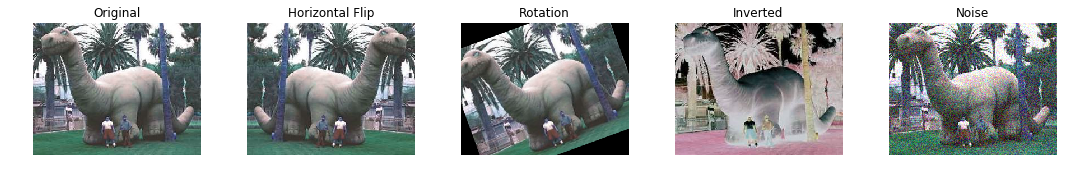

In [127]:
show_images(augmented_images, img_names)

In [ ]:
## Augmenting data to all the categories those have less than 150 images

In [138]:
img_dir1 = '/Volumes/Work2/work/python/projects/Face Recognition/Augmented data'
category_cnt = -1
for root, dirs, files in os.walk(img_dir1):
    for name in dirs:
        category_cnt += 1
        if target_unique_values[category_cnt][1] > 150:
            continue
        data_path = os.path.join(img_dir1,name)
        data_path2 = os.path.join(data_path,'*')
        count = target_unique_values[category_cnt][1]
        for filename in glob.glob(data_path2):
            img = cv2.imread(filename)
            aug_d = augment_data(img)
            count = save_images(aug_d, count, data_path)
            if count > 150:
                break


## Resizing and normalizing the images
### And saving all the image data to image_list and target in target_list

In [4]:
img_dir1 = '/Volumes/Work2/work/python/projects/Face Recognition/101_ObjectCategories'
image_list = []
target_list = []
target_unique_values_new = []
count1 = 0
for root, dirs, files in os.walk(img_dir1):
    for name in dirs:
        data_path = os.path.join(img_dir1,name)
        data_path2 = os.path.join(data_path,'*')
        count = 0 
        for filename in glob.glob(data_path2): 
            count =count+1
            img = cv2.imread(filename)   # , cv2.IMREAD_GRAYSCALE)
            img = imresize(img, (256, 256))                     # resizing the image
            img = img.astype(np.float32) / 255                  # normalizing the images
            image_list.append(img)
            target_list.append(name)
        target_unique_values_new.append([name,count])    

In [5]:
target_unique_values_new

[['accordion', 55],
 ['airplanes', 800],
 ['anchor', 42],
 ['ant', 42],
 ['BACKGROUND_Google', 468],
 ['barrel', 47],
 ['bass', 54],
 ['beaver', 46],
 ['binocular', 33],
 ['bonsai', 128],
 ['brain', 98],
 ['brontosaurus', 43],
 ['buddha', 85],
 ['butterfly', 91],
 ['camera', 50],
 ['cannon', 43],
 ['car_side', 123],
 ['ceiling_fan', 47],
 ['cellphone', 59],
 ['chair', 62],
 ['chandelier', 107],
 ['cougar_body', 47],
 ['cougar_face', 69],
 ['crab', 73],
 ['crayfish', 70],
 ['crocodile', 50],
 ['crocodile_head', 51],
 ['cup', 57],
 ['dalmatian', 67],
 ['dollar_bill', 52],
 ['dolphin', 65],
 ['dragonfly', 68],
 ['electric_guitar', 75],
 ['elephant', 64],
 ['emu', 53],
 ['euphonium', 64],
 ['ewer', 85],
 ['Faces', 435],
 ['Faces_easy', 435],
 ['ferry', 67],
 ['flamingo', 67],
 ['flamingo_head', 45],
 ['garfield', 34],
 ['gerenuk', 34],
 ['gramophone', 51],
 ['grand_piano', 99],
 ['hawksbill', 100],
 ['headphone', 42],
 ['hedgehog', 54],
 ['helicopter', 88],
 ['ibis', 80],
 ['inline_skate',

In [6]:
image_array = np.array(image_list)
target_array = np.array(target_list)
print(image_array.shape, target_array.shape)

(9145, 256, 256, 3) (9145,)


### Converting the target (strings) into numerical values

In [7]:
from sklearn.preprocessing import LabelEncoder
l_e = LabelEncoder()

In [8]:
y = l_e.fit_transform(target_array)

### Shuffling the images

In [10]:
shuffle = np.random.permutation(image_array.shape[0])

In [11]:
y_shuffled = y[shuffle]

In [12]:
x_shuffled = image_array[shuffle]

### Reducing the dimentions of input array using PCA

In [12]:
from sklearn.decomposition import PCA

In [60]:
o_pca = PCA(n_components=2500)
X_reduced = o_pca.fit_transform(x_shuffled)

# Building model

### Spliting data in training and testing

In [13]:
from sklearn.model_selection import cross_val_score,train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, test_size=0.25)

In [14]:
import tensorflow as tf
import numpy as np

In [15]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [16]:
reset_graph()

height = 256
width = 256
channels = 3
n_inputs = height * width

conv1_fmaps = 40
conv1_ksize = 7
conv1_stride = 2
conv1_pad = "SAME"

conv2_fmaps = 60
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"

conv3_fmaps = 80
conv3_ksize = 3
conv3_stride = 2
conv3_pad = "SAME"

conv4_fmaps = 80
conv4_ksize = 3
conv4_stride = 1
conv4_pad = "SAME"

conv5_fmaps = 100
conv5_ksize = 3
conv5_stride = 1
conv5_pad = "SAME"

conv6_fmaps = 120
conv6_ksize = 3
conv6_stride = 2
conv6_pad = "SAME"

dropout_rate = 0


In [17]:
pool1_fmaps = conv2_fmaps
pool2_fmaps = conv4_fmaps

n_fc1 = 100
n_fc2 = 50
n_outputs = 102

In [18]:
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
    #X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool1"):
    pool1 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    #pool1_flat = tf.reshape(pool1, shape=[-1, pool1_fmaps * 16,pool1_fmaps * 16])
    
conv3 = tf.layers.conv2d(pool1, filters=conv3_fmaps, kernel_size=conv3_ksize,
                         strides=conv3_stride, padding=conv3_pad,
                         activation=tf.nn.relu, name="conv3")
conv4 = tf.layers.conv2d(conv3, filters=conv4_fmaps, kernel_size=conv4_ksize,
                         strides=conv4_stride, padding=conv4_pad,
                         activation=tf.nn.relu, name="conv4")

In [19]:
with tf.name_scope("pool2"):
    pool2 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    #pool2_flat = tf.reshape(pool2, shape=[-1, pool2_fmaps * 8 * 8])

    
conv5 = tf.layers.conv2d(pool2, filters=conv5_fmaps, kernel_size=conv5_ksize,
                         strides=conv5_stride, padding=conv5_pad,
                       activation=tf.nn.relu, name="conv5")

conv6 = tf.layers.conv2d(conv5, filters=conv6_fmaps, kernel_size=conv6_ksize,
                       strides=conv6_stride, padding=conv6_pad,
                      activation=tf.nn.relu, name="conv6")
conv6_flat = tf.reshape(conv6, shape=[-1, conv6_fmaps * 8 * 8])

#with tf.name_scope("pool3"):
    #pool3 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    #pool3_flat = tf.reshape(pool3, shape=[-1, conv6_fmaps * 4 * 4])


with tf.name_scope("dropout"):
    training = tf.placeholder_with_default(False, shape=(), name='training')
    pool3_flat_drop = tf.layers.dropout(conv6_flat, dropout_rate, training=training)



with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, dropout_rate, training=training)

with tf.name_scope("fc2"):
    fc2 = tf.layers.dense(fc1_drop, n_fc2, activation=tf.nn.relu, name="fc2")
    fc2_drop = tf.layers.dropout(fc2, dropout_rate, training=training)
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc2_drop, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

In [20]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()


In [23]:
n_epochs = 10
batch_size = 50

In [24]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(X_train.shape[0] // batch_size):
            X_batch, y_batch = X_train[batch_size*(iteration):batch_size*(iteration+1)], y_train[batch_size*(iteration):batch_size*(iteration+1)]
            con1_size = conv1.eval(feed_dict={X: X_batch, y: y_batch})
            con2_size = conv2.eval(feed_dict={X: X_batch, y: y_batch})
            pool1_size = pool1.eval(feed_dict={X: X_batch, y: y_batch})
            con3_size = conv3.eval(feed_dict={X: X_batch, y: y_batch})
            con4_size = conv4.eval(feed_dict={X: X_batch, y: y_batch})
            pool2_size = pool2.eval(feed_dict={X: X_batch, y: y_batch})
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
        acc = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print(epoch, "Accuracy:", acc)

        save_path = saver.save(sess, "./my_imageRecognition_model")


0 Accuracy: 0.18
1 Accuracy: 0.32
2 Accuracy: 0.38
3 Accuracy: 0.46
4 Accuracy: 0.48
5 Accuracy: 0.52
6 Accuracy: 0.62
7 Accuracy: 0.58
8 Accuracy: 0.68
9 Accuracy: 0.72
